In [46]:
import numpy as np

from gscore.fdr import GlobalDistribution

In [59]:
model_path = "/home/aaron/projects/ghost/data/spike_in/models/protein.test"

In [60]:
global_model = GlobalDistribution.load(model_path)

In [61]:
import pandas as pd

check = pd.DataFrame(
    {
        "label": global_model.labels.ravel(),
        "scores": global_model.scores.ravel()
    }
)

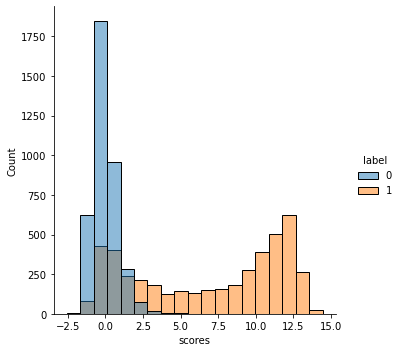

In [62]:
import seaborn as sns

sns.displot(check, x="scores", hue="label")

In [63]:
decoy_values = check[check["scores"] >= 0.50]["label"].value_counts()

In [64]:
decoy_values[0] / decoy_values[1]

0.2072880908370742

In [65]:
function_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.target_scores.ravel(),
        "type": ["Target" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

In [66]:
function_check

,label,scores,type
0,-2.584470,0.000000,Target
1,-2.567404,0.000000,Target
2,-2.550338,0.000000,Target
3,-2.533272,0.000000,Target
4,-2.516205,0.000000,Target
...,...,...,...
995,14.396285,0.003176,Target
996,14.413351,0.003050,Target
997,14.430417,0.002923,Target
998,14.447483,0.002805,Target


In [67]:
decoy_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.decoy_scores.ravel(),
        "type": ["Decoy" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

all_scores = pd.concat(
    [
        function_check,
        decoy_check
    ]
).reset_index()

<AxesSubplot:xlabel='label', ylabel='scores'>

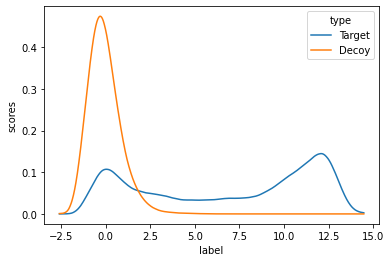

In [68]:
sns.lineplot(data=all_scores, x="label", y="scores", hue="type")

In [69]:
global_model.q_values[global_model.q_values <= 0.01]

array([0.        , 0.        , 0.        , ..., 0.00751226, 0.00872631,
       0.00094425])